**Aim: Generation of "full" dataset - merge of toxcast targets with currently used predictors in the field (Chen M et al., 2016 + Falgun Shah et al., 2015) followed by PCA- for modeling of liver toxicity (mostDILI)**

As preparation of dataset for modeling purposes, after "full" dataset is created by merging, it will be processed for variable reduction by PCA.  Post-PCA "full" dataset will be exported as a csv file. The entire task will be broken down to two distinct steps for easier readability of code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#magic command to print all output instead of only last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



**Step 1: read in datasets, re-arrange columns as needed, merge, export to csv. Use the final output from this step as starting point for PCA in step 2.**



In [3]:
#read-in datasets with ToxCast data for dili targets (continuous format) and variables within FDA's current model/mc_var_labeled 
#variables for FDA's current model based on Minjun Chen's paper (Chen M et al., 2016 Hepatolog)

#dili_targets continuous
dtc=pd.read_csv("dili_targets_continuous.csv")
dtc.head()

#mc_var_labeled
mc_labeled=pd.read_csv("mc_var_labeled.csv")

    #rearrange column names in mc_labeled such that "classificn" moves to last column
mc_labeled.columns

mcl_col_order=["chnm", "cmax", "mol_wt", "dailydose", "logP", "reactive_metabolites", "classificn"] #desired column order

set(mc_labeled.columns) == set(mcl_col_order)#check to see if all column names are retained in "mcl_col_order"

mc_labeled=mc_labeled[mcl_col_order]

mc_labeled.head()

,chnm,ADCY5,ADORA1,ADORA2,ADORA2A,ADRA1A,ADRA1B,ADRA2A,ADRA2B,ADRB1,...,zf_jaw,zf_nc,zf_pe,zf_snou,zf_somi,zf_swim,zf_teratoscore,zf_tr,zf_trun,zf_yse
0,abacavir,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,acetaminophen,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,acitretin,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,albendazole,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,alclofenac,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0


Index(['chnm', 'classificn', 'cmax', 'mol_wt', 'dailydose', 'logP',
       'reactive_metabolites'],
      dtype='object')

True

,chnm,cmax,mol_wt,dailydose,logP,reactive_metabolites,classificn
0,ambrisentan,2.6124,378.42108,7.5,3.78,1,0
1,amrinone,13.7820,187.19795,500.0,-0.46,0,0
2,aztreonam,142.3860,435.43278,4000.0,-1.73,0,0
3,capecitabine,7.9309,359.35008,5600.0,0.40,0,0
4,carbidopa,0.6630,226.22915,70.0,-1.90,0,0


In [4]:
#merge dili_targets_continuous with mc_var_labeled data  (MinjunChen Variables + ToxCast Variables with classification labels attached for 175 drugs)
mc_tc_merge=pd.merge(dtc,mc_labeled, on="chnm")

mc_tc_merge.head()

mc_tc_merge.to_csv('mc_tc_merge.csv', index=False) 

mc_tc_merge2=pd.merge(dtc, mc_labeled, on="chnm")
    #duplicate of mc_tc_merge (for use later in appending columns that will need to be dropped during PCA)
    


,chnm,ADCY5,ADORA1,ADORA2,ADORA2A,ADRA1A,ADRA1B,ADRA2A,ADRA2B,ADRB1,...,zf_teratoscore,zf_tr,zf_trun,zf_yse,cmax,mol_wt,dailydose,logP,reactive_metabolites,classificn
0,abacavir,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,14.8985,286.33232,600.0,1.20,1,1
1,acetaminophen,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,132.3066,151.16255,3000.0,0.46,1,1
2,acitretin,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,1.2805,326.42934,35.0,6.40,0,1
3,albendazole,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,0.9045,265.33139,400.0,2.70,1,1
4,alclofenac,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,600.0276,226.65623,1250.0,2.88,1,1


**Step 2: Process output from step 1 for variable reduction by PCA; re-attach labels and chemical names at end and export as csv**

In [5]:
#Drop column containing drug name ("chnm" and "classificn") and check for correlation across all variables
mc_tc_merge.drop(["chnm", "classificn"], axis=1, inplace = True)


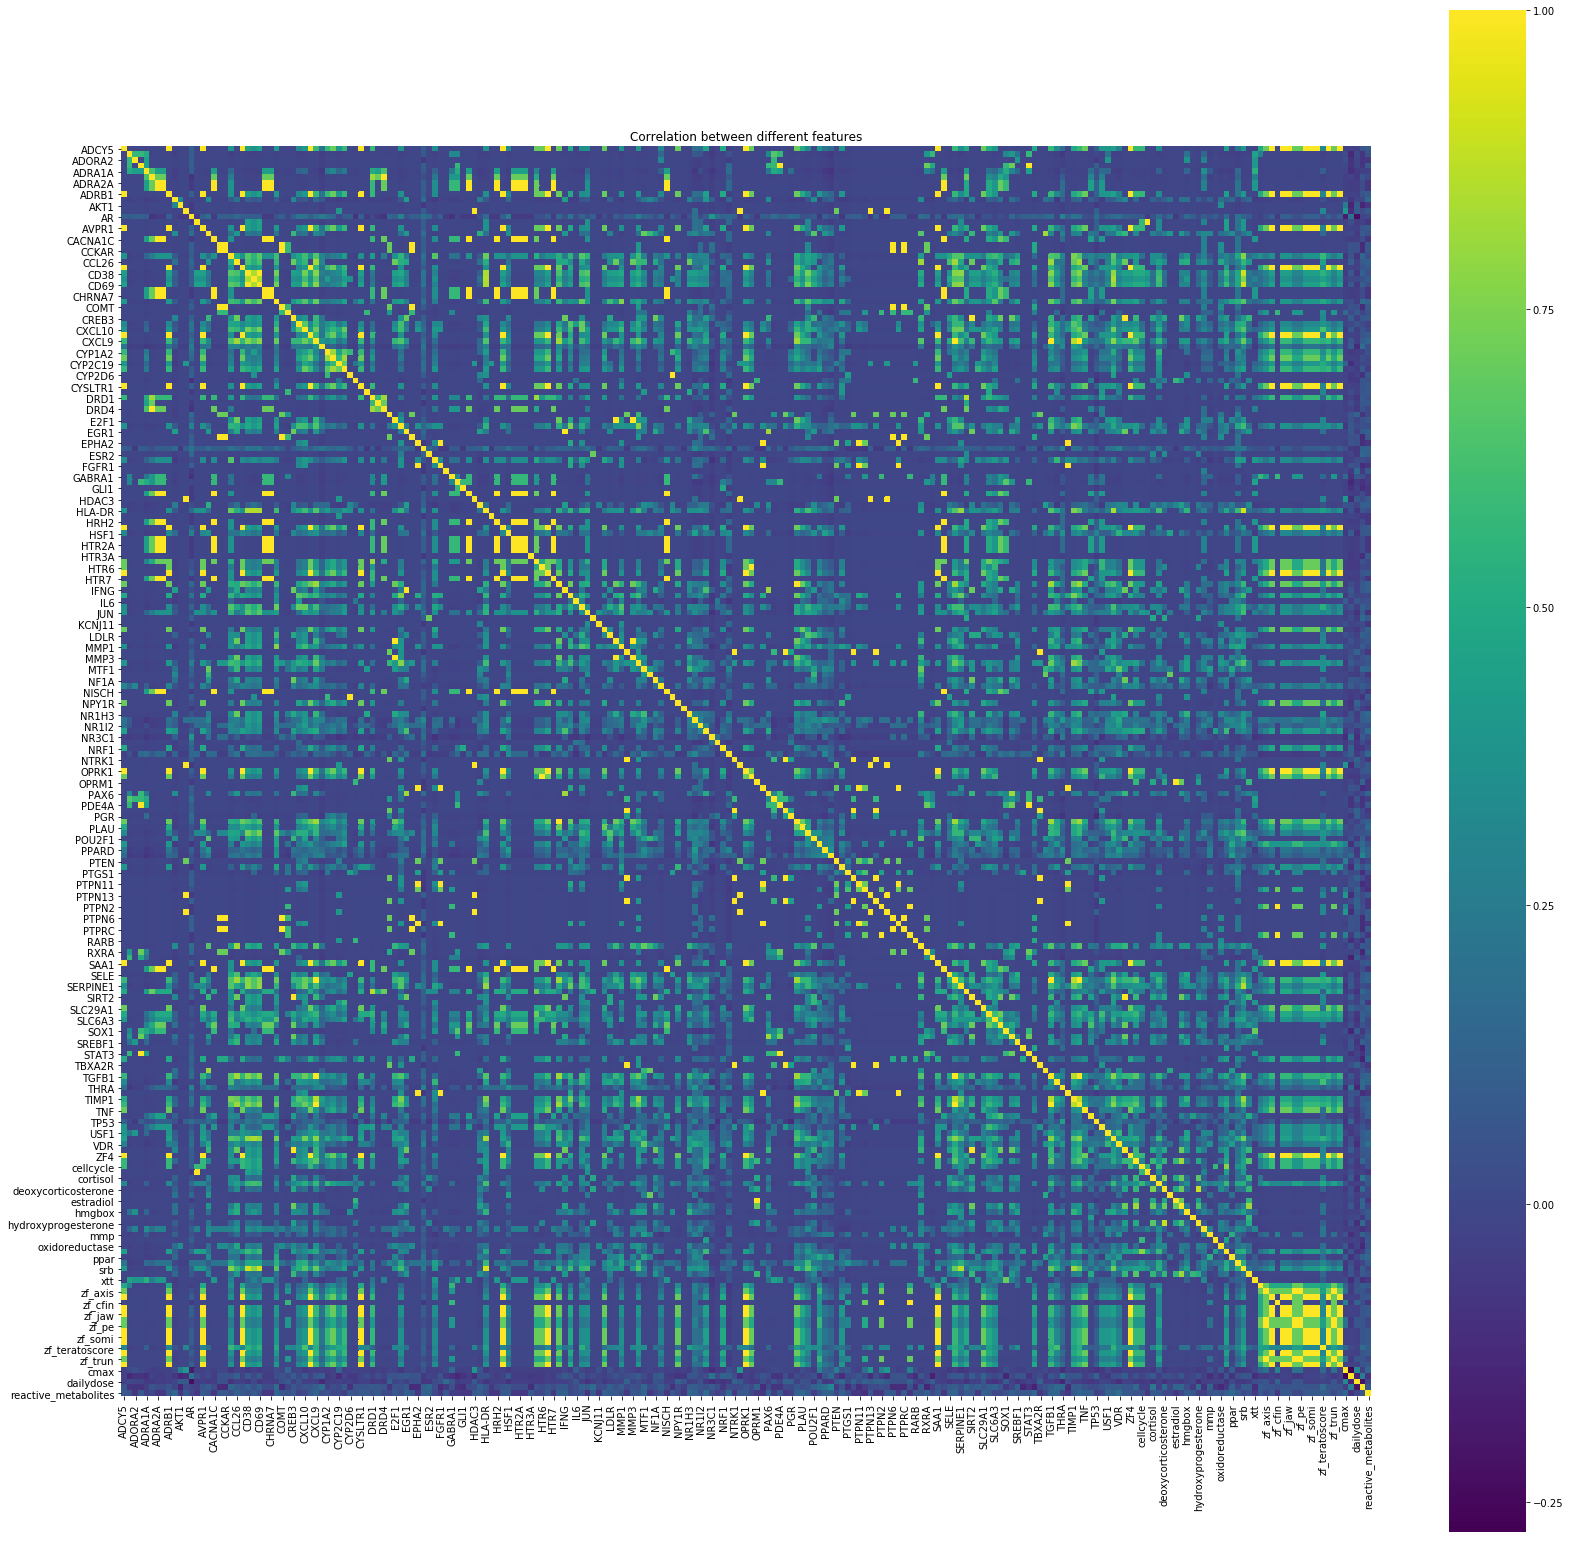

In [6]:
correlation = mc_tc_merge.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square=True,cmap='viridis')
plt.title('Correlation between different features')
plt.show();

In [7]:
# Scale the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #instantiate StandardScaler class
fd_mctc_scaled= scaler.fit_transform(mc_tc_merge) #fit-transform instantiated class and save to an numpy array
fd_mctc_scaled=pd.DataFrame(fd_mctc_scaled, columns=mc_tc_merge.columns) #saved "scaled" data to a dataframe

fd_mctc_scaled.head()

,ADCY5,ADORA1,ADORA2,ADORA2A,ADRA1A,ADRA1B,ADRA2A,ADRA2B,ADRB1,AHR,...,zf_swim,zf_teratoscore,zf_tr,zf_trun,zf_yse,cmax,mol_wt,dailydose,logP,reactive_metabolites
0,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,4.064416,...,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581,-0.246513,-0.411151,0.040093,-0.459470,1.017292
1,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581,0.997393,-1.359063,2.832049,-0.791490,1.017292
2,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581,-0.390792,-0.129961,-0.617180,1.873645,-0.983002
3,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,4.056358,...,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581,-0.394776,-0.558426,-0.192570,0.213544,1.017292
4,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581,5.952769,-0.829645,0.796248,0.294306,1.017292


In [8]:
# Fit PCA on scaled data

from sklearn.decomposition import PCA
pca = PCA().fit(fd_mctc_scaled)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

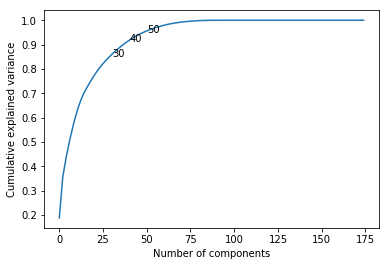

In [19]:
#Evaluate explained variance with increasing # of principal components

pca.explained_variance_ratio_[:10].sum() # first 10 principal components account for ~60% of variance in data
pca.explained_variance_ratio_[:20].sum() # first 20 principal components account for ~76% of variance in data
pca.explained_variance_ratio_[:30].sum() # first 30 principal components account for ~85% of variance in data
pca.explained_variance_ratio_[:40].sum() # first 40 principal components account for ~91% of variance in data
pca.explained_variance_ratio_[:50].sum() # first 50 principal components account for ~95% of variance in data

# Plot relation between components and variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('30',xy=(30, .85))
plt.annotate('40',xy=(40, .91))
plt.annotate('50',xy=(50, .95))
plt.show();


In [16]:
#Fit PCA transformer to dataset so as to explain ~85% of variance

x_pca=PCA(n_components=0.85)
eightyfive_percent_pca=x_pca.fit_transform(fd_mctc_scaled)

#determine # of principal components (#and retrieve first 3 principal components (as an example))
sum(x_pca.explained_variance_) # total of 30 principal components
#x_pca.components_.T[:, 0:3]


189.51894081940446

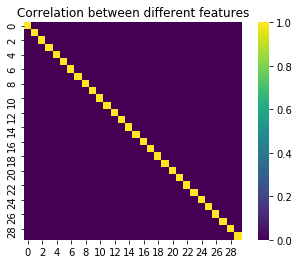

In [11]:
# correlation between principal components after PCA @ ~85% variance explained

correlation = pd.DataFrame(eightyfive_percent_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')
plt.show(); # All principal components are orthogonal to each other

In [12]:
#Create dataframe of principal components 
pca_targets=pd.DataFrame(eightyfive_percent_pca, columns = ("P1", "P2", "P3", "P4", "P5", "P6",
                                           "P7", "P8", "P9", "P10", "P11", "P12",
                                           "P13", "P14", "P15", "P16", "P17", "P18",
                                           "P19", "P20", "P21", "P22", "P23", "P24",
                                           "P25", "P26", "P27", "P28", "P29", "P30"))

pca_targets.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30
0,-1.444762,-0.649513,-0.062304,-0.644003,-0.315813,0.012594,-0.065045,-0.231388,-0.150218,-0.040412,...,-0.331244,0.123063,1.036630,0.139326,0.812508,0.420413,0.753550,-0.256332,0.046677,-0.172548
1,-0.309496,0.169900,1.727844,0.772510,0.539620,0.242570,1.063954,0.103382,2.772589,0.246153,...,-1.009552,-0.390303,0.080579,2.855425,0.421643,-1.936300,0.543964,-1.354443,-0.605531,1.300690
2,-1.094369,-0.538019,-0.072097,-0.580733,-0.549017,0.599654,0.123163,0.000038,-0.445833,-0.233491,...,0.347138,0.466004,0.560191,-0.549604,-0.431520,0.592038,-0.583815,-0.571781,0.117369,-0.187685
3,-0.558443,1.035149,-1.156281,-0.551930,-0.480370,0.652524,-0.503921,0.271689,-0.043037,-0.013518,...,-0.104059,0.037598,-0.110890,-1.228410,1.093255,1.857060,-0.180542,-0.610346,-0.250679,0.792903
4,-1.414305,-0.912262,0.019345,-0.169191,-0.357133,-0.014595,-0.369297,0.662525,0.078874,1.038107,...,-0.730894,0.457491,1.342014,0.192954,-0.250706,0.105768,0.190462,-0.563103,-0.608185,0.379748


In [13]:
#export dataframe of principal components - after appending drug names back to data post-PCA

frames=[mc_tc_merge2["chnm"],pca_targets]

fd_tc_mc_post_pca=pd.concat(frames, axis=1)

fd_tc_mc_post_pca.head()


,chnm,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30
0,abacavir,-1.444762,-0.649513,-0.062304,-0.644003,-0.315813,0.012594,-0.065045,-0.231388,-0.150218,...,-0.331244,0.123063,1.036630,0.139326,0.812508,0.420413,0.753550,-0.256332,0.046677,-0.172548
1,acetaminophen,-0.309496,0.169900,1.727844,0.772510,0.539620,0.242570,1.063954,0.103382,2.772589,...,-1.009552,-0.390303,0.080579,2.855425,0.421643,-1.936300,0.543964,-1.354443,-0.605531,1.300690
2,acitretin,-1.094369,-0.538019,-0.072097,-0.580733,-0.549017,0.599654,0.123163,0.000038,-0.445833,...,0.347138,0.466004,0.560191,-0.549604,-0.431520,0.592038,-0.583815,-0.571781,0.117369,-0.187685
3,albendazole,-0.558443,1.035149,-1.156281,-0.551930,-0.480370,0.652524,-0.503921,0.271689,-0.043037,...,-0.104059,0.037598,-0.110890,-1.228410,1.093255,1.857060,-0.180542,-0.610346,-0.250679,0.792903
4,alclofenac,-1.414305,-0.912262,0.019345,-0.169191,-0.357133,-0.014595,-0.369297,0.662525,0.078874,...,-0.730894,0.457491,1.342014,0.192954,-0.250706,0.105768,0.190462,-0.563103,-0.608185,0.379748


In [14]:
#merge full dataset (fd_tc_mc_post_pca) with DILI classification label (mostDILI=1, all other DILI categories = 0)
mc_labeled=pd.read_csv("mc_var_labeled.csv")
mc_labeled.head()
mcl=mc_labeled.loc[:, ["chnm", "classificn"]]

mctc_pca_labeled=pd.merge(fd_tc_mc_post_pca,mcl, on="chnm")

mctc_pca_labeled.head()

mctc_pca_labeled.to_csv('mctc_pca_labeled.csv', index=False) 
    #export toxcast targets + minjun chen targets after PCA (@85% var explained) with classification labels attached

,chnm,classificn,cmax,mol_wt,dailydose,logP,reactive_metabolites
0,ambrisentan,0,2.6124,378.42108,7.5,3.78,1
1,amrinone,0,13.7820,187.19795,500.0,-0.46,0
2,aztreonam,0,142.3860,435.43278,4000.0,-1.73,0
3,capecitabine,0,7.9309,359.35008,5600.0,0.40,0
4,carbidopa,0,0.6630,226.22915,70.0,-1.90,0


,chnm,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,classificn
0,abacavir,-1.444762,-0.649513,-0.062304,-0.644003,-0.315813,0.012594,-0.065045,-0.231388,-0.150218,...,0.123063,1.036630,0.139326,0.812508,0.420413,0.753550,-0.256332,0.046677,-0.172548,1
1,acetaminophen,-0.309496,0.169900,1.727844,0.772510,0.539620,0.242570,1.063954,0.103382,2.772589,...,-0.390303,0.080579,2.855425,0.421643,-1.936300,0.543964,-1.354443,-0.605531,1.300690,1
2,acitretin,-1.094369,-0.538019,-0.072097,-0.580733,-0.549017,0.599654,0.123163,0.000038,-0.445833,...,0.466004,0.560191,-0.549604,-0.431520,0.592038,-0.583815,-0.571781,0.117369,-0.187685,1
3,albendazole,-0.558443,1.035149,-1.156281,-0.551930,-0.480370,0.652524,-0.503921,0.271689,-0.043037,...,0.037598,-0.110890,-1.228410,1.093255,1.857060,-0.180542,-0.610346,-0.250679,0.792903,1
4,alclofenac,-1.414305,-0.912262,0.019345,-0.169191,-0.357133,-0.014595,-0.369297,0.662525,0.078874,...,0.457491,1.342014,0.192954,-0.250706,0.105768,0.190462,-0.563103,-0.608185,0.379748,1


In [15]:
##The End##